# Challenge 3: Fundamentals of Prompt Engineering & Evaluation

In this challenge, we'll explore core principles of effective prompt engineering, focusing on practical techniques for crafting prompts and evaluating them using Microsoft's tools. We'll apply these concepts to create effective prompts for HR policy explanation during employee onboarding - a common use case for AI assistants in the workplace.

## 1. Core Principles of Effective Prompt Crafting

Effective prompts follow these key principles:

1. **Role & Context Setting**: Define the AI's role and provide context for the task. For example, instructing the AI to act as "an HR specialist helping new employees understand company policies."

2. **Clear Instructions**: Provide specific, unambiguous directions about what you want the AI to do. For instance, "Explain the company's leave policy in simple language that new employees can easily understand."

3. **Input/Output Format Specification**: Clearly define how to format inputs and expected outputs. For example, "Present the information in a Q&A format with common questions new employees might have."

4. **Few-Shot Examples**: Provide examples demonstrating desired input/output patterns to guide the AI's responses. For instance, giving an example of how a policy explanation should be structured.

5. **Chain-of-Thought Prompting**: Guide the model through a reasoning process. For example, "First explain the basic entitlement, then outline the procedure for requesting leave, and finally describe any special conditions."

6. **System vs User Prompts**: Utilize system prompts for personality and user prompts for specific requests. For instance, setting the system prompt to establish the AI as an HR assistant, and using user prompts for specific policy questions.

When creating prompts for HR policy explanation during employee onboarding, these principles help ensure that explanations are clear, consistent, and tailored to new employees' needs.

## 2. Setting up Our Environment

First, let's install the necessary python packages for our prompt engineering and evaluation work.<br>
We will use the Azure OpenAI client for generating responses and the Azure AI Evaluation SDK for measuring prompt effectiveness.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from dotenv import load_dotenv
from openai import AsyncAzureOpenAI

# Load environment variables
load_dotenv()

# Set up AsyncOpenAI client with Azure credentials
client = AsyncAzureOpenAI(
    azure_endpoint=os.getenv('AZURE_OPENAI_ENDPOINT'),
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT'),
    api_key=os.getenv('AZURE_OPENAI_KEY'),
    api_version = "2024-12-01-preview"
)

## 3. Interactive Prompt Development

Let's set up a function to test our prompts interactively. This function will allow us to send prompts to the AI model and receive responses, which is essential for the iterative process of prompt refinement. 

Interactive prompt development is crucial for HR policy explanation as it allows us to quickly test different approaches to explaining complex policies and see which ones produce the most clear and helpful responses for new employees.

In [21]:
async def get_completion(prompt, system_prompt="You are a helpful assistant.", temperature=0.2):
    """Get a completion from the OpenAI API"""
    response = await client.chat.completions.create(
        model="gpt-4o-mini",  # You can change this to your preferred model
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        temperature=temperature,
    )
    return response.choices[0].message.content

In [10]:
response = await get_completion(input())
display.Markdown(response)

I am based on OpenAI's GPT-3 model. If you have any questions or need assistance, feel free to ask!

## 4. Prompt Scenarios: HR Policy Explanation

Now let's explore a prompt scenario relevant to our HR onboarding use case.
We will create prompts for an AI assistant that explains company policies to new employees.

First let's try a basic prompt without much engineering and analyse the result, then we create an improved version using the principles we've discussed. 
This will demonstrate how proper prompt engineering can significantly improve the quality of policy explanations for new employees.

#### Basic Prompt

In [11]:
# Let's use our HR policy explanation example instead of the research paper
hr_policy = """
Company Work-From-Home Policy

Effective Date: January 1, 2023

1. Policy Purpose
This policy establishes guidelines for employees to work from home while maintaining productivity and effective operations.

2. Eligibility
- Full-time employees who have completed their three-month probationary period
- Employees with satisfactory performance reviews
- Roles suitable for remote work as determined by department managers

3. Work-From-Home Arrangements
- Employees may work from home up to two (2) days per week
- Requests must be submitted through the HR portal at least 24 hours in advance
- Approval is at the discretion of the employee's direct manager
- Regular work hours (9am-5pm) must be maintained during remote work days

4. Employee Responsibilities
- Maintain availability during business hours via approved communication channels
- Attend all scheduled meetings virtually
- Ensure a secure internet connection and appropriate workspace
- Follow all data security and confidentiality requirements
- Report any work-related accidents that occur during remote work hours

5. Equipment and Support
- Company will provide laptop and necessary software
- IT support available during normal business hours
- Employees are responsible for maintaining reliable internet connection

6. Termination of Arrangement
The company reserves the right to modify or terminate work-from-home arrangements if:
- Business needs change
- Performance or productivity concerns arise
- Policy violations occur
"""

# Basic prompt without engineering techniques
basic_prompt = f"Explain this work-from-home policy: {hr_policy}"

In [12]:
basic_response = await get_completion(basic_prompt)

result = f'<h5 style="color: blanchedalmond;">BASIC PROMPT RESPONSE</h5><p>{basic_response}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">BASIC PROMPT RESPONSE</h5><p>This work-from-home policy outlines the framework and expectations for employees who wish to work remotely. Here’s a breakdown of the key components:

### 1. Policy Purpose
The primary goal of this policy is to provide a structured approach for employees to work from home while ensuring that productivity and operational effectiveness are maintained.

### 2. Eligibility
To qualify for the work-from-home arrangement, employees must meet the following criteria:
- **Employment Status**: Only full-time employees who have successfully completed a three-month probationary period are eligible.
- **Performance**: Employees must have satisfactory performance reviews, indicating they meet the company's performance standards.
- **Role Suitability**: The employee's role must be deemed suitable for remote work by their department manager, ensuring that the nature of the job can be effectively performed outside the office.

### 3. Work-From-Home Arrangements
- **Frequency**: Employees are allowed to work from home up to two days each week.
- **Request Process**: Employees must submit their requests to work from home through the HR portal at least 24 hours in advance, allowing for proper planning and management.
- **Approval**: The direct manager has the discretion to approve or deny the request based on business needs and employee performance.
- **Work Hours**: Employees are expected to maintain regular work hours (9 AM to 5 PM) on remote work days, ensuring consistency in availability and productivity.

### 4. Employee Responsibilities
While working from home, employees are required to:
- **Availability**: Remain accessible during business hours through designated communication channels (e.g., email, chat).
- **Meetings**: Attend all scheduled meetings virtually, ensuring participation and engagement.
- **Workspace**: Create a secure and appropriate workspace to facilitate effective work.
- **Data Security**: Adhere to all data security and confidentiality protocols to protect company information.
- **Incident Reporting**: Report any work-related accidents that occur during remote work hours, ensuring that the company is aware of any incidents.

### 5. Equipment and Support
- **Company Equipment**: The company will provide employees with a laptop and necessary software to perform their job functions.
- **IT Support**: IT support will be available during normal business hours to assist with any technical issues.
- **Internet Responsibility**: Employees are responsible for ensuring they have a reliable internet connection to perform their duties effectively.

### 6. Termination of Arrangement
The company retains the right to modify or terminate work-from-home arrangements under certain conditions, including:
- **Business Needs**: Changes in business requirements that necessitate a return to the office.
- **Performance Issues**: Concerns regarding an employee's performance or productivity while working remotely.
- **Policy Violations**: Any breaches of the work-from-home policy that may warrant disciplinary action.

### Summary
Overall, this policy aims to balance the flexibility of remote work with the need for accountability and productivity. It sets clear expectations for eligibility, responsibilities, and the process for requesting remote work, while also outlining the company's rights to modify the arrangement as necessary.</p>

#### Engineered Prompt

In [13]:
# Engineered prompt using best practices for HR onboarding
engineered_prompt = f"""
You are an HR specialist helping new employees understand company policies during their onboarding process.

Explain the following work-from-home policy in a clear and friendly manner that new employees will find helpful and easy to understand. 

Format your response with these components:
1. A brief title and overview
2. Clear sections with headings covering eligibility, how to request WFH days, and employee responsibilities
3. A Q&A section addressing 3 common questions new employees might have
4. Contact information for additional help

Use bullet points and numbered lists where appropriate to make the information easily scannable. 
Maintain a friendly, supportive tone appropriate for new employees who are still learning company procedures.

POLICY TO EXPLAIN:
{hr_policy}
"""

In [14]:
engineered_response = await get_completion(engineered_prompt)

result = f'<h5 style="color: blanchedalmond;">ENGINEERED PROMPT RESPONSE</h5><p>{engineered_response}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">ENGINEERED PROMPT RESPONSE</h5><p># Work-From-Home Policy Overview

Welcome to our Work-From-Home (WFH) Policy! This policy is designed to help you understand how you can work from home while ensuring that our operations remain smooth and productive. We want to support you in balancing your work and personal life, so let’s dive into the details!

## Eligibility

To be eligible for working from home, you need to meet the following criteria:

- **Full-Time Status**: You must be a full-time employee.
- **Probation Period**: You should have completed your three-month probationary period.
- **Performance Reviews**: You need to have satisfactory performance reviews.
- **Role Suitability**: Your role must be suitable for remote work, as determined by your department manager.

## How to Request WFH Days

If you meet the eligibility criteria and want to work from home, here’s how to request your WFH days:

1. **Plan Ahead**: You can work from home up to **two (2) days per week**.
2. **Submit Your Request**: Use the HR portal to submit your request at least **24 hours in advance**.
3. **Manager Approval**: Your direct manager will review your request and grant approval at their discretion.
4. **Maintain Regular Hours**: Remember to keep your regular work hours (9 AM - 5 PM) while working from home.

## Employee Responsibilities

When you’re working from home, it’s important to stay responsible and connected. Here’s what you need to do:

- **Stay Available**: Be reachable during business hours through approved communication channels.
- **Attend Meetings**: Join all scheduled meetings virtually.
- **Secure Workspace**: Ensure you have a secure internet connection and a suitable workspace.
- **Data Security**: Follow all data security and confidentiality requirements.
- **Report Incidents**: If any work-related accidents occur during your remote work hours, report them immediately.

## Q&A Section

**1. Can I work from home more than two days a week?**  
   - Generally, the policy allows for up to two days per week. If you have special circumstances, please discuss them with your manager.

**2. What if my request to work from home is denied?**  
   - If your request is denied, your manager will provide feedback. You can always ask for clarification or discuss alternative arrangements.

**3. What should I do if I experience technical issues while working from home?**  
   - If you encounter any technical problems, please reach out to our IT support during normal business hours for assistance.

## Need More Help?

If you have any questions or need further assistance regarding the Work-From-Home policy, feel free to reach out to our HR team:

- **Email**: hr@company.com
- **Phone**: (123) 456-7890

We’re here to help you navigate your new role and ensure you have a smooth onboarding experience. Happy working from home!</p>

### Comparing the Responses

Notice the significant differences between the two responses:

**Basic Prompt Response:**
- Presents information as a dense paragraph
- Lacks clear structure and organization
- Uses more formal, policy-like language
- Misses some details from the original policy
- Difficult for new employees to quickly scan and understand

**Engineered Prompt Response:**
- Uses a clear, hierarchical structure with headings
- Incorporates bullet points and numbering for easier scanning
- Adds a helpful Q&A section addressing common concerns
- Uses a friendly, supportive tone appropriate for onboarding
- Includes contact information for further questions
- Much more useful for new employees learning about company policies

This example demonstrates how proper prompt engineering can significantly improve policy explanations for employee onboarding, making complex information more accessible and user-friendly.

## 5. Few-Shot Learning Example: HR Case Handling

Next, let's create a prompt for an HR assistant that handles employee questions about policies using few-shot examples.<br>
Few-shot learning is particularly valuable in HR contexts because it helps ensure consistent handling of policy questions across the organization.

In [15]:
# Here we'll set up an HR policy question handler using few-shot examples
hr_questions = """
1. What types of personal leave are available?
2. How do I submit a request for professional development funding?
3. What is the process for reporting workplace harassment?
"""

In [22]:
# Few-shot HR assistant prompt
def create_hr_assistant_prompt(hr_questions):
    hr_assistant_prompt = f"""
You are an experienced HR specialist who provides clear, helpful responses to employee questions about company policies.
Your goal is to give accurate information in an approachable, easy-to-understand format.

Here are examples of the kind of responses you should provide:

QUESTION 1:
How does the company's health insurance work?

RESPONSE 1:
Our company offers two health insurance plans:

• Standard Plan: $500 deductible, 80% coverage after deductible, $25 copay for office visits
• Premium Plan: $250 deductible, 90% coverage after deductible, $15 copay for office visits

Enrollment periods:
1. When you're first hired (within 30 days)
2. During open enrollment (November 1-15 each year)
3. After qualifying life events (marriage, birth of child, etc.)

Coverage begins on the 1st day of the month following enrollment.

For detailed plan documents or questions about specific coverage, contact benefits@company.com.

QUESTION 2:
What is the company's policy on performance reviews?

RESPONSE 2:
Performance reviews are conducted twice yearly:

• Mid-year review (June): Informal check-in on goals, development, and progress
• Annual review (December): Formal evaluation tied to compensation decisions

The process works like this:
1. You'll complete a self-assessment in the HR system
2. Your manager will complete their assessment of your performance
3. You'll have a one-on-one meeting to discuss feedback and set new goals
4. Both you and your manager will sign off on the final review

New employees hired less than 3 months before a review period may have a modified process.

For specific questions about your upcoming review, please speak with your direct manager.

Now, please respond to the following employee questions in the same clear, helpful format:

{hr_questions}
"""
    return hr_assistant_prompt

hr_assistant_prompt = create_hr_assistant_prompt(hr_questions)

hr_responses = await get_completion(hr_assistant_prompt)

display.Markdown(hr_responses)

**QUESTION 1: What types of personal leave are available?**

**RESPONSE 1:**
Our company offers several types of personal leave to support employees:

1. **Sick Leave:** Employees accrue 1 day of sick leave for every month worked, up to a maximum of 12 days per year. Sick leave can be used for personal illness or to care for a sick family member.

2. **Vacation Leave:** Full-time employees receive 15 days of vacation leave per year, which accrues monthly. Unused vacation days can be carried over to the next year, up to a maximum of 30 days.

3. **Personal Leave:** Employees may request up to 5 days of personal leave per year for personal matters that require time away from work. This leave is unpaid unless you have vacation days available.

4. **Family and Medical Leave (FMLA):** Eligible employees can take up to 12 weeks of unpaid leave for serious health conditions, family care, or childbirth. This leave is job-protected.

To request any type of leave, please fill out the Leave Request Form available on the HR portal and submit it to your manager for approval.

For more information on specific leave policies, you can contact HR at hr@company.com.

---

**QUESTION 2: How do I submit a request for professional development funding?**

**RESPONSE 2:**
To request funding for professional development, follow these steps:

1. **Identify the Opportunity:** Find a course, workshop, or conference that aligns with your professional goals and benefits the company.

2. **Complete the Funding Request Form:** Fill out the Professional Development Funding Request Form, detailing the opportunity, costs, and how it will benefit your role and the company.

3. **Submit for Approval:** Send the completed form to your direct manager for initial approval. They may provide feedback or suggest modifications.

4. **Final Submission:** Once your manager approves, submit the form to the HR department at hr@company.com for final review and funding allocation.

Please submit requests at least 30 days before the event to allow for processing. For questions about eligibility or funding limits, feel free to reach out to HR.

---

**QUESTION 3: What is the process for reporting workplace harassment?**

**RESPONSE 3:**
We take workplace harassment very seriously and have a clear process for reporting it:

1. **Document the Incident:** Write down details of the incident(s), including dates, times, locations, and any witnesses.

2. **Report to Your Manager:** If you feel comfortable, report the harassment to your direct manager. They are trained to handle these situations sensitively.

3. **Contact HR:** If you prefer not to speak with your manager or if the harassment involves them, you can report the issue directly to the HR department at hr@company.com. You can also call the HR hotline at (555) 123-4567.

4. **Investigation:** HR will conduct a thorough investigation while maintaining confidentiality as much as possible. You will be informed of the outcome and any actions taken.

5. **No Retaliation:** Our company has a strict no-retaliation policy. You will not face any negative consequences for reporting harassment in good faith.

If you have any questions or need support during this process, please reach out to HR. Your safety and well-being are our top priorities.

### The Power of Few-Shot Learning for HR Policy Explanation

The example above demonstrates how few-shot learning can dramatically improve the quality of HR policy explanations.<br>
By providing examples of well-structured, clear responses to policy questions, we:

1. **Ensure consistency** in how policies are explained to employees
2. **Establish a standardized format** that makes information easy to scan and understand
3. **Model the appropriate tone** that balances professionalism with accessibility
4. **Include practical details** that employees need, like contact information and next steps

This approach is particularly valuable during employee onboarding, where new team members are encountering many company policies for the first time and need clear, actionable information.

## 6. Chain-of-Thought Prompting: Complex Policy Explanation

Now let's explore chain-of-thought prompting for explaining a more complex HR policy.<br>
This technique is especially useful for policies with multiple conditions, exceptions, or procedural steps that need to be clearly explained to new employees.

In [23]:
# Complex travel and expense policy
complex_policy = """
COMPANY TRAVEL AND EXPENSE REIMBURSEMENT POLICY

1. GENERAL GUIDELINES
1.1 This policy applies to all employees traveling for business purposes and submitting expenses for reimbursement.
1.2 All business travel requires manager approval prior to booking.
1.3 Employees must book travel through the designated corporate travel portal.
1.4 All expenses must be reasonable, necessary, and for legitimate business purposes.

2. TRANSPORTATION
2.1 Air Travel
   2.1.1 Economy class is required for flights under 8 hours duration.
   2.1.2 Business class is permitted for flights over 8 hours duration.
   2.1.3 Tickets should be purchased at least 14 days in advance when possible.

2.2 Ground Transportation
   2.2.1 Personal vehicle use is reimbursed at $0.55 per mile.
   2.2.2 Rental cars must be economy or compact class unless 3+ employees are traveling together.
   2.2.3 Standard ride services are permitted; premium options are not reimbursable.

3. LODGING
3.1 Employees should stay at preferred partner hotels when available.
3.2 Maximum nightly rates vary by location and are specified in the travel portal.
3.3 Standard single rooms are authorized; upgrades are at employee's expense.

4. MEALS AND ENTERTAINMENT
4.1 Meals are reimbursed at actual cost with appropriate receipts.
4.2 Daily meal limits are: $60 domestic, $100 international.
4.3 Itemized receipts are required for all purchases over $25.
4.4 Client entertainment requires pre-approval and business justification.

5. EXPENSE REPORTING
5.1 All expense reports must be submitted within 15 days of trip completion.
5.2 Reports must be submitted through the expense management system.
5.3 Original or digital copies of receipts must be attached for all expenses over $25.
5.4 Expenses are typically reimbursed within 7-10 business days after approval.

6. NON-REIMBURSABLE ITEMS
6.1 Personal entertainment (movies, gym fees, etc.)
6.2 Expenses for spouse or family members
6.3 Flight upgrades outside of policy
6.4 Alcohol (except for client entertainment with prior approval)

7. EXCEPTIONS
7.1 Exceptions to this policy require CFO approval for expenses exceeding limits by more than 10%.
7.2 Exception requests must be submitted with written justification.
"""

# Standard prompt
standard_explanation_prompt = f"""
Explain this travel and expense reimbursement policy to new employees:

{complex_policy}
"""

standard_explanation = await get_completion("How much will I be reimbursed for international travel?", standard_explanation_prompt)

result = f'<h5 style="color: blanchedalmond;">STANDARD EXPLANATION</h5><p>{standard_explanation}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">STANDARD EXPLANATION</h5><p>For international travel, you will be reimbursed for meals at an actual cost, but there is a daily limit of $100. Additionally, for transportation and lodging, you will need to follow the specific guidelines outlined in the policy, such as booking flights in business class for flights over 8 hours and staying at preferred partner hotels within the maximum nightly rates specified in the travel portal. 

Make sure to keep all receipts, as itemized receipts are required for any expenses over $25. If you have any specific expenses in mind, feel free to ask for more details!</p>

In [24]:
# Chain-of-thought prompt
cot_explanation_prompt = f"""
You are an HR specialist helping new employees understand company policies during onboarding.

Please explain the following travel and expense policy in a way that's easy for new employees to understand and follow. 

To provide a comprehensive explanation, please:

1. First, explain the basic purpose of the policy and who it applies to.
2. Then, break down the process into logical steps (before travel, during travel, after travel).
3. For each step, explain what the employee needs to do, what limits apply, and any exceptions.
4. Highlight common mistakes new employees make with expense reporting.
5. Finally, provide information on who to contact with questions.

Use a friendly, helpful tone and format your response with clear headings, bullet points, and numbered lists where appropriate.
Title your response "Travel & Expense Policy Explanation for New Employees"

POLICY TO EXPLAIN:
{complex_policy}
"""

cot_explanation = await get_completion("How much will I be reimbursed for international travel?", cot_explanation_prompt)

result = f'<h5 style="color: blanchedalmond;">CHAIN-OF-THOUGHT EXPLANATION</h5><p>{cot_explanation}</p>'

display.Markdown(result)

<h5 style="color: blanchedalmond;">CHAIN-OF-THOUGHT EXPLANATION</h5><p>**Travel & Expense Policy Explanation for New Employees**

Welcome to the team! Understanding our travel and expense policy is essential for ensuring a smooth experience when you travel for business. Let’s break it down step by step.

### 1. Purpose of the Policy
- **What is it?** This policy outlines how employees can get reimbursed for expenses incurred while traveling for business purposes.
- **Who does it apply to?** It applies to all employees who travel for work and need to submit expenses for reimbursement.

### 2. Travel Process Breakdown

#### **Before Travel**
1. **Get Manager Approval**
   - **What to do:** Always seek approval from your manager before booking any travel.
   - **Limits:** No travel should be booked without this approval.

2. **Book Travel**
   - **What to do:** Use the designated corporate travel portal to book your flights, hotels, and transportation.
   - **Limits:** Ensure you follow the guidelines for transportation and lodging.

#### **During Travel**
1. **Transportation**
   - **Air Travel:** 
     - Economy class for flights under 8 hours.
     - Business class for flights over 8 hours.
     - Book tickets at least 14 days in advance when possible.
   - **Ground Transportation:**
     - Personal vehicle: Reimbursed at $0.55 per mile.
     - Rental cars: Must be economy or compact unless traveling with 3+ employees.
     - Standard ride services are allowed; premium options are not reimbursable.

2. **Lodging**
   - **What to do:** Stay at preferred partner hotels when available.
   - **Limits:** Follow the maximum nightly rates specified in the travel portal. Standard single rooms are authorized; upgrades are at your expense.

3. **Meals and Entertainment**
   - **What to do:** Keep all receipts for meals and entertainment.
   - **Limits:** 
     - Meals: Actual cost with limits of $60 per day for domestic travel and $100 for international travel.
     - Itemized receipts are required for purchases over $25.
     - Client entertainment requires pre-approval.

#### **After Travel**
1. **Expense Reporting**
   - **What to do:** Submit your expense report within 15 days of completing your trip.
   - **Limits:** Use the expense management system and attach original or digital copies of receipts for expenses over $25.
   - **Reimbursement Timeline:** Typically, you’ll receive reimbursement within 7-10 business days after approval.

### 3. Common Mistakes to Avoid
- **Not Getting Approval:** Failing to get manager approval before booking travel.
- **Missing Receipts:** Forgetting to keep receipts for expenses over $25.
- **Late Submissions:** Submitting expense reports after the 15-day deadline.
- **Exceeding Limits:** Not adhering to meal and lodging limits.

### 4. Questions?
If you have any questions about the travel and expense policy, please reach out to the HR department or your manager. They are here to help you navigate any uncertainties!

By following these guidelines, you can ensure that your travel experience is efficient and that you receive the reimbursements you deserve. Safe travels!</p>

### Benefits of Chain-of-Thought Prompting for Complex Policies

Notice how the chain-of-thought approach transforms a complex policy into a step-by-step guide that's much easier for new employees to understand and follow. Key advantages include:

1. **Logical Flow**: The policy is explained as a process with clear steps, making it easier to understand the sequence of actions required.

2. **Contextual Understanding**: Each section explains not just what to do, but why it matters and how it fits into the bigger picture.

3. **Practical Focus**: The explanation emphasizes what employees need to know to comply with the policy correctly.

4. **Anticipating Questions**: By addressing common mistakes and special circumstances, the explanation proactively answers questions new employees are likely to have.

This approach is particularly valuable for complex HR policies that might otherwise be overwhelming during the onboarding process.

## 7. Evaluation with Azure AI Evaluation SDK

Now let's explore Microsoft's Azure AI Evaluation SDK to quantitatively evaluate our prompts.<br>
For HR policy explanations during onboarding, it's important to measure how clear, helpful, and accurate the explanations are - evaluation helps ensure our prompts are genuinely helping new employees understand company policies.

In [25]:
# Import the Azure AI Evaluation SDK
from azure.ai.evaluation import RelevanceEvaluator, FluencyEvaluator, CoherenceEvaluator
from typing import Dict

# Configure the model for evaluation
model_config = {
    "azure_endpoint": os.getenv("AZURE_OPENAI_ENDPOINT"),
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "azure_deployment": os.getenv("AZURE_OPENAI_DEPLOYMENT"),
    "api_version": "2024-12-01-preview"
}

### Evaluating HR Policy Explanations

The `evaluate_policy_explanation` function performs a comprehensive evaluation of policy explanations using three different evaluators. 
Each evaluator is initialized with model configuration settings for:

- Relevance: Measures how well the text addresses the intended topic
- Fluency: Assesses language quality and readability
- Coherence: Evaluates logical flow and structure

In [26]:
def evaluate_policy_explanation(text: str, reference_text: str) -> Dict:

    # Initialize evaluators
    relevance_evaluator = RelevanceEvaluator(model_config)
    fluency_evaluator = FluencyEvaluator(model_config)
    coherence_evaluator = CoherenceEvaluator(model_config)
    
    # Perform evaluations asynchronously
    relevance_result = relevance_evaluator(
        query=text,
        response=reference_text
    )
    
    fluency_result = fluency_evaluator(
        response=reference_text
    )
    
    coherence_result = coherence_evaluator(
        query=text,
        response=reference_text
    )

    # Return evaluation results
    return {
        'relevance': relevance_result,
        'fluency': fluency_result,
        'coherence': coherence_result
    }

The `format_evaluation_results` function transforms raw evaluation data into a human-readable report format.

In [27]:
def format_evaluation_results(eval_dict):
    
    def create_score_emoji(score):
        if score >= 5.0:
            return "⭐⭐⭐⭐⭐"
        elif score >= 4.0:
            return "⭐⭐⭐⭐"
        elif score >= 3.0:
            return "⭐⭐⭐"
        elif score >= 2.0:
            return "⭐⭐"
        else:
            return "⭐"

    print("\n📊 POLICY EVALUATION REPORT")
    print("=" * 80)

    for category, details in eval_dict.items():
        print(f"\n📌 {category.upper()}")
        print("-" * 80)
        
        if 'gpt_' + category in details:
            score = details[category]
            gpt_score = details['gpt_' + category]
            reason = details[category + '_reason']
            
            print(f"Score:        {score:.1f}/5.0  {create_score_emoji(score)}")
            print(f"GPT Score:    {gpt_score:.1f}/5.0  {create_score_emoji(gpt_score)}")
            print(f"\nReasoning:")
            print(f"└─ {reason}")
        
        print()

Now let's run the evaluation for the standard prompt that explains the company policy.
This will produce a small report where you can see the scores of the evaluations and also the reasoning.

Here's a breakdown of what the values of the report are:

- **Score**: This is the relevance score, which ranges from 1 to 5. A score of 1 indicates poor relevance, while a score of 5 indicates high relevance. This score reflects how well the response captures the key points of the context and addresses the query1.

- **GPT Score**: This is similar to the relevance score but specifically tailored for GPT models. It assesses the model's understanding and ability to generate contextually appropriate responses. The GPT score also ranges from 1 to 51.

- **Reasoning**: This provides an explanation of why the given score was assigned. It includes details on how well the response aligns with the query, the completeness of the answer, and any contextual appropriateness. The reasoning helps in understanding the strengths and weaknesses of the response

In [28]:
# Evaluate the standard explanation
standard_result = evaluate_policy_explanation(
    standard_explanation_prompt, 
    standard_explanation
)

standard_formatted_result = format_evaluation_results(standard_result)


📊 POLICY EVALUATION REPORT

📌 RELEVANCE
--------------------------------------------------------------------------------
Score:        3.0/5.0  ⭐⭐⭐
GPT Score:    3.0/5.0  ⭐⭐⭐

Reasoning:
└─ The RESPONSE provides relevant information about meal reimbursement and some transportation and lodging guidelines but does not cover the entire policy, making it incomplete. Thus, it should be rated as a 3 for being an incomplete response.


📌 FLUENCY
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The input Data should get a Score of 4 because it is well-articulated, with good grammar and a varied vocabulary. The sentences are complex and coherent, and the message is easily understood without any significant errors affecting comprehension.


📌 COHERENCE
--------------------------------------------------------------------------------
Score:        3.0/5.0  ⭐⭐⭐
GPT Score:    3.0/5.0  ⭐⭐⭐

Reasoni

Now we will do the same evaluation to the Chain of Thouhgt prompt:

In [29]:
# Evaluate the standard explanation
cot_result = evaluate_policy_explanation(
    cot_explanation_prompt, 
    cot_explanation
)

cot_formatted_result = format_evaluation_results(cot_result)


📊 POLICY EVALUATION REPORT

📌 RELEVANCE
--------------------------------------------------------------------------------
Score:        5.0/5.0  ⭐⭐⭐⭐⭐
GPT Score:    5.0/5.0  ⭐⭐⭐⭐⭐

Reasoning:
└─ The RESPONSE fully addresses the QUERY with accurate, complete, and well-organized information, making it a comprehensive response that includes additional insights and guidance for new employees.


📌 FLUENCY
--------------------------------------------------------------------------------
Score:        4.0/5.0  ⭐⭐⭐⭐
GPT Score:    4.0/5.0  ⭐⭐⭐⭐

Reasoning:
└─ The input Data should receive a Score of 4 because it is well-articulated, coherent, and uses a varied vocabulary with complex sentence structures. There are minor errors, but they do not affect overall understanding, and the text flows smoothly.


📌 COHERENCE
--------------------------------------------------------------------------------
Score:        5.0/5.0  ⭐⭐⭐⭐⭐
GPT Score:    5.0/5.0  ⭐⭐⭐⭐⭐

Reasoning:
└─ The RESPONSE is coherent and 

### Visualizing Evaluation Results

Visualizing evaluation results helps us understand the strengths and weaknesses of different prompting approaches. For HR policy explanations, this data can help determine which approaches are most effective for helping new employees understand complex policies.

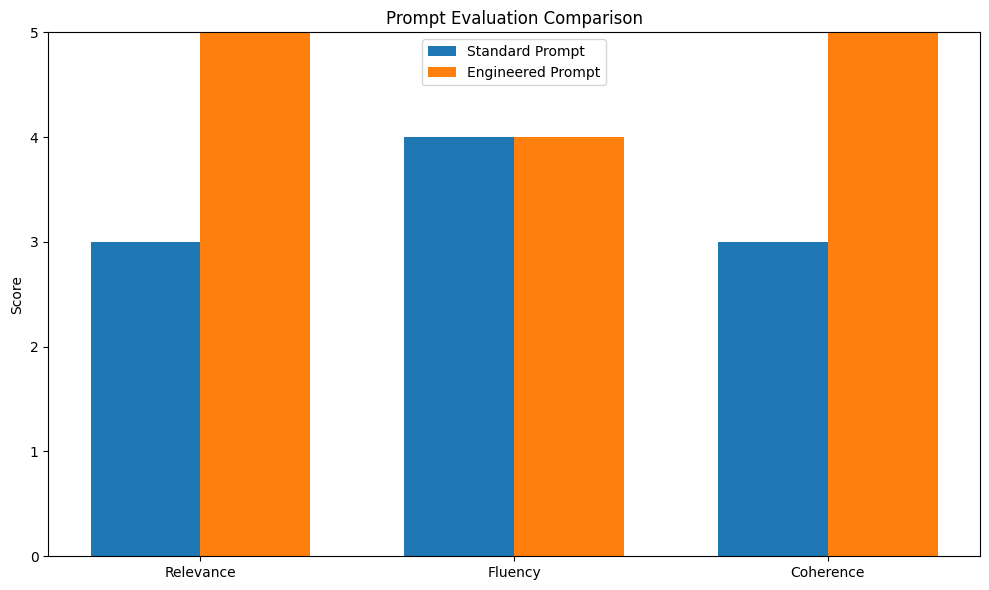

In [30]:
def visualize_evaluation(basic_scores, engineered_scores, metrics):
    """Create a bar chart comparing evaluation scores"""
    x = np.arange(len(metrics))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, basic_scores, width, label='Standard Prompt')
    ax.bar(x + width/2, engineered_scores, width, label='Engineered Prompt')
    
    ax.set_ylim(0, 5)
    ax.set_ylabel('Score')
    ax.set_title('Prompt Evaluation Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Extract scores
basic_scores = [standard_result["relevance"]["relevance"], standard_result["fluency"]["fluency"], standard_result["coherence"]["coherence"]]
engineered_scores = [cot_result["relevance"]["relevance"], cot_result["fluency"]["fluency"], cot_result["coherence"]["coherence"]]
metrics = ['Relevance', 'Fluency', 'Coherence']

visualize_evaluation(basic_scores, engineered_scores, metrics)

## 8. Key Takeaways and Best Practices

Based on our experiments with prompt engineering and evaluation, here are the key takeaways:

1. **Clear Role Definition**: Defining the AI's role significantly improves response quality
2. **Structured Formatting**: Requesting specific output formats produces more organized, usable outputs
3. **Few-Shot Examples**: Providing examples dramatically improves the model's ability to follow patterns
4. **Chain-of-Thought**: Guiding the model through a reasoning process improves analytical outputs
5. **Quantitative Evaluation**: Using consistent metrics helps identify areas for improvement
6. **Multiple Metrics**: Evaluating along different dimensions provides a more complete picture of prompt quality

These principles can be applied to any prompt engineering task and help create more effective AI interactions.

## 9. Conclusion

In this challenge, we've explored fundamental prompt engineering techniques and evaluation methods using Microsoft's Azure AI Evaluation SDK. We've seen how different prompting approaches can dramatically improve the quality, relevance, and usefulness of AI-generated content.

By applying structured evaluation metrics, we were able to quantitatively measure improvements and guide our prompt refinement process. This systematic approach to prompt engineering can be applied to many different business scenarios, helping to create more effective AI interactions.